# Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. 

Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

# importing data
df = pd.read_csv('./data/fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot
- We need to create an instance of the FacetGrid object and specify the feature we want to facet by ("cat_var" in our example). 
- We use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset 

Moreover, we can:
- wrap the columns using the col_wrap
- set the titles of each chart using the set_titles fun of FacetGrid
- ordering the data using the mean

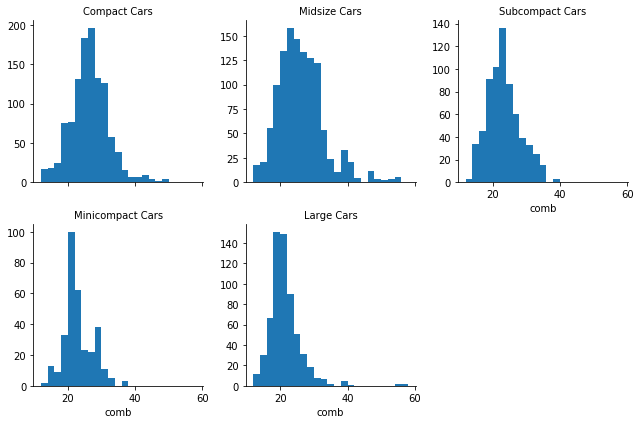

In [11]:
bins = np.arange(12, 58+2, 2)

group_means = df.groupby(['VClass']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index

g = sb.FacetGrid(data=df, col='VClass', col_wrap=3, sharey=False, col_order=group_order)
g.map(plt.hist, 'comb', bins=bins)
g.set_titles('{col_name}');